In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPooling2D,UpSampling2D,Activation
from tensorflow.keras.layers import Subtract,BatchNormalization,Conv2DTranspose
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import img_to_array

In [3]:
input = Input(shape=(224,224,1))
x = Conv2D(64,kernel_size= (3,3), padding='same')(input)
x = Activation('relu')(x)
for i in range(17):
    x = Conv2D(64, kernel_size=(3,3), padding='same')(x)
    x = BatchNormalization(axis=-1)(x)
    x = Activation('relu')(x)   
x = Conv2D(3, kernel_size=(3,3), padding='same')(x)
x = Subtract()([input, x])   
model = Model(input,x)

model.compile(optimizer='adam', loss='mean_squared_error')

In [4]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 224, 224, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 224, 224, 64) 0           conv2d_19[0][0]                  
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 224, 224, 64) 36928       activation_18[0][0]              
____________________________________________________________________________________________

In [ ]:
noise_data = []
path1 = "/content/drive/MyDrive/Motion Artifact/Noisy/"
files = os.listdir(path1)
for i in tqdm(files):
    img = cv2.imread(path1 + '/'+i, 0)
    img = cv2.resize(img,(224,224))
    noise_data.append(img_to_array(img))

100%|██████████| 1000/1000 [00:09<00:00, 104.05it/s]


In [ ]:
clean_data = []
path2 = "/content/drive/MyDrive/Motion Artifact/Normal"
files = os.listdir(path2)
for i in tqdm(files):
    img = cv2.imread(path2 + '/'+i, 0)
    img = cv2.resize(img,(224,224))
    clean_data.append(img_to_array(img))

100%|██████████| 1000/1000 [00:09<00:00, 102.63it/s]


In [ ]:
noisy_train = np.reshape(noise_data,(len(noise_data),224,224,1))
noisy_train = noisy_train.astype('float32')/255.

clean_train = np.reshape(clean_data,(len(clean_data),224,224,1))
clean_train = clean_train.astype('float32')/255.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, 
                                                    test_size = 0.20, random_state = 0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 224, 224, 1)
(800, 224, 224, 1)
(200, 224, 224, 1)
(200, 224, 224, 1)


In [ ]:
model.fit(x_train, y_train,epochs=10,batch_size=8,shuffle=True)

Epoch 1/10
100/100 [==============================] - 120s 1s/step - loss: 0.0832
Epoch 2/10
100/100 [==============================] - 118s 1s/step - loss: 0.0537
Epoch 3/10
100/100 [==============================] - 118s 1s/step - loss: 0.0530
Epoch 4/10
100/100 [==============================] - 118s 1s/step - loss: 0.0522
Epoch 5/10
100/100 [==============================] - 118s 1s/step - loss: 0.0508
Epoch 6/10
100/100 [==============================] - 118s 1s/step - loss: 0.0509
Epoch 7/10
100/100 [==============================] - 118s 1s/step - loss: 0.0507
Epoch 8/10
100/100 [==============================] - 118s 1s/step - loss: 0.0505
Epoch 9/10
100/100 [==============================] - 118s 1s/step - loss: 0.0502
Epoch 10/10
100/100 [==============================] - 118s 1s/step - loss: 0.0498


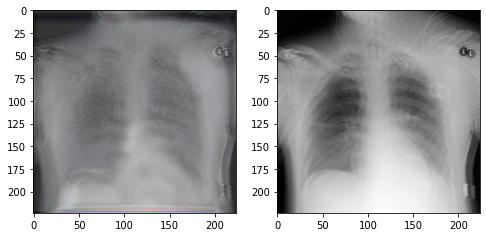

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(121)
plt.imshow(np.squeeze(no_noise_img[2]), cmap="gray")
plt.subplot(122)
plt.imshow(np.squeeze(x_test[2]),cmap="gray")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f227ddda1d0>,
 Text(0.5, 1.0, 'denoised'))

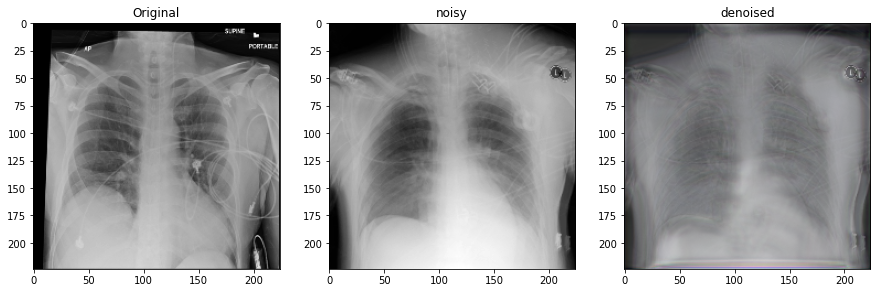

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(131), plt.imshow(np.squeeze(y_test[2]), cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(np.squeeze(x_test[2]),cmap="gray"),plt.title('noisy')
plt.subplot(133), plt.imshow(np.squeeze(no_noise_img[2]),cmap="gray"),plt.title('denoised')